In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Data treatment

In [48]:
toilet_data = 'dat/VDB_16S_metadata.txt'
bacteria_data = 'dat/VDB_16S_dataset.txt'

In [49]:
# Ajoute une ligne à un DataFrame
# (DataFrame, list) -> DataFrame

def addRow(df, row):
    pos=df.shape[0]
    df.loc[pos] = row
    return df

In [50]:
# Récupère la liste des différentes familles taxonomiques pour la liste des OTUs fournis

def familyListing(otu_list):
    length = 0
    missing = 0
    family_list = []
    family_dict = {}
    #
    for otu in otu_list:
        lineage = full_df[otu[0]][-1:].values[0]
        family_name = lineage.split(';')[-3].split('__')[1]
        if family_name != '':
            family_list.append((family_name, otu[1]))
            length += 1
        else:
            missing += 1
    print(f"\n\nfamily data was available for {length} OTUs, and missing for {missing} of them.")
    # Création d'un dictionnaire contenant pour chaque surface les comptages
    # de toutes les familles taxonomiques
    for i in sorted(family_list):
        # création d'une nouvelle clé correspondant à la famille si elle n'existe pas déjà, addition des comptages des OTUs 
        # appartenant à cette famille
        if i[0] not in family_dict:
            family_dict[i[0]] = i[1]
        else:
            family_dict[i[0]] += i[1]

    return family_dict

In [51]:
sampling_data_df = pd.read_csv(toilet_data, sep='\t')

In [52]:
# Préparation pour la fusion des dataframes
bacteria_data_df = pd.read_csv(bacteria_data, sep = '\t').T
bacteria_data_df = bacteria_data_df.rename(columns=bacteria_data_df.iloc[0])
bacteria_data_df = bacteria_data_df.drop('#OTU ID')
bacteria_data_df = bacteria_data_df.rename_axis('SampleID').reset_index()
bacteria_data_df

,SampleID,469478,208196,378462,265971,570812,213370,127012,246528,16076,...,115007,151393,528028,114903,144964,198655,203087,89363,542202,159715
0,EKCM2.489495,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,EKBM8.489473,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,EKCF4.489498,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PTBM9.489505,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EKBF10.489552,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,B5.489455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2392.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
106,B1.489537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,9.0,0.0,285.0,4.0,43.0,0.0,0.0
107,B3.489528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,1.0,0.0,0.0,0.0,184.0,2.0,79.0,10.0,17.0
108,B2.489526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,437.0,0.0,83.0,0.0,0.0


In [53]:
row = ['ConsensusLineage', None, None, None, None]
addRow(sampling_data_df, row)

,SampleID,Gender,Floor,Building,Surface
0,EKCM2.489495,Male,C,Ekeley,Door out
1,EKBM8.489473,Male,B,Ekeley,Faucet handles
2,EKCF4.489498,Female,C,Ekeley,Stall out
3,PTBM9.489505,Male,B,Porter,Soap dispenser
4,EKBF10.489552,Female,B,Ekeley,Sink floor
...,...,...,...,...,...
105,B5.489455,None,B,Porter,Water
106,B1.489537,None,A,Ekeley,Water
107,B3.489528,None,C,Ekeley,Water
108,B2.489526,None,B,Ekeley,Water


In [54]:
# Fusion
full_df = pd.merge(sampling_data_df, bacteria_data_df, on = 'SampleID')
full_df

,SampleID,Gender,Floor,Building,Surface,469478,208196,378462,265971,570812,...,115007,151393,528028,114903,144964,198655,203087,89363,542202,159715
0,EKCM2.489495,Male,C,Ekeley,Door out,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,EKBM8.489473,Male,B,Ekeley,Faucet handles,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,EKCF4.489498,Female,C,Ekeley,Stall out,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PTBM9.489505,Male,B,Porter,Soap dispenser,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EKBF10.489552,Female,B,Ekeley,Sink floor,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,B5.489455,None,B,Porter,Water,0.0,0.0,0.0,0.0,0.0,...,2392.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
106,B1.489537,None,A,Ekeley,Water,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,9.0,0.0,285.0,4.0,43.0,0.0,0.0
107,B3.489528,None,C,Ekeley,Water,0.0,0.0,0.0,0.0,0.0,...,17.0,1.0,0.0,0.0,0.0,184.0,2.0,79.0,10.0,17.0
108,B2.489526,None,B,Ekeley,Water,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,437.0,0.0,83.0,0.0,0.0


In [55]:
# On va récupérer toutes les familles de bactéries pour chaque surface pour chaque bâtiment: choix des famille pour 
# réduire la taille du jeu de données et parce qu'il manque moins d'informations que pour les espèces et les genres

building = list(sampling_data_df['Building'].unique())
list_surfaces = list(sampling_data_df['Surface'].unique())
Ekeley = {}
Porter = {}

for building in building:
    df_building = full_df[full_df['Building']== building]
    for surface in list_surfaces:
        df_surface = df_building[df_building['Surface']== surface]

        # Cette ligne permet de récupérer les OTUs présent au moins une fois après application des filtres de bâtiments 
        # et de surface.
        df_surface = df_surface.loc[:, (df_surface != 0).any(axis=0)] 

        # On récupère la liste des OTUs associés aux valeurs relevées
        temp_list = list(df_surface.columns.values[5:])
        
        # On fait la somme des comptages des OTUs pour chaque lieu de prélèvement dans chaque bâtiment
        otu_list = []
        for otu in temp_list:
            otu_list.append((otu, sum(df_surface[otu])))
    
        # la liste des familles de bactéries présentes en fonction du bâtiment
        if building == 'Ekeley':
            Ekeley[surface] = familyListing(otu_list)
        if building == 'Porter':
            Porter[surface] = familyListing(otu_list)




family data was available for 656 OTUs, and missing for 60 of them.


family data was available for 753 OTUs, and missing for 80 of them.


family data was available for 684 OTUs, and missing for 63 of them.


family data was available for 488 OTUs, and missing for 32 of them.


family data was available for 1313 OTUs, and missing for 264 of them.


family data was available for 542 OTUs, and missing for 59 of them.


family data was available for 1411 OTUs, and missing for 272 of them.


family data was available for 234 OTUs, and missing for 23 of them.


family data was available for 1145 OTUs, and missing for 206 of them.


family data was available for 786 OTUs, and missing for 78 of them.


family data was available for 51 OTUs, and missing for 9 of them.


family data was available for 0 OTUs, and missing for 0 of them.


family data was available for 527 OTUs, and missing for 53 of them.


family data was available for 530 OTUs, and missing for 42 of them.


family data was a

**Nb.** La cellule ci-dessous a été dupliquée pour résoudre un problème rencontré lors de la création des barplots (légende illisible). Nous n'avons pas réussi à comprendre pourquoi cela arrive, les graphes erronés affichent des valeurs de comptage inférieures à 1% alors qu'elles auraient du être retirées.

In [56]:
# Conversion des données en fraction des comptages totaux pour chaque surface pour chaque bâtiment
to_remove = []
for surface in Ekeley.keys():
    bacterias_total = sum(Ekeley[surface].values())
    for family in Ekeley[surface]:
        if Ekeley[surface][family] >= 0.01:
            Ekeley[surface][family] /= bacterias_total
        else:
            to_remove.append((surface, family))

for surface in Porter.keys():
    bacterias_total = sum(Porter[surface].values())
    for family in Porter[surface]:
        if Porter[surface][family] >= 0.01:
            Porter[surface][family] /= bacterias_total
        else:
            to_remove.append((surface, family))
            
# On retire les familles dont les comptages sont inférieurs à 1% du total des comptages de la surface
for remove_data in to_remove:
    if remove_data[1] in Ekeley[remove_data[0]].keys():
        Ekeley[remove_data[0]].pop(remove_data[1])

    if remove_data[1] in Porter[remove_data[0]].keys():
        Porter[remove_data[0]].pop(remove_data[1])
        


In [57]:
# Conversion des données en fraction des comptages totaux pour chaque surface pour chaque bâtiment
to_remove = []
for surface in Ekeley.keys():
    bacterias_total = sum(Ekeley[surface].values())
    for family in Ekeley[surface]:
        if Ekeley[surface][family] >= 0.01:
            Ekeley[surface][family] /= bacterias_total
        else:
            to_remove.append((surface, family))

for surface in Porter.keys():
    bacterias_total = sum(Porter[surface].values())
    for family in Porter[surface]:
        if Porter[surface][family] >= 0.01:
            Porter[surface][family] /= bacterias_total
        else:
            to_remove.append((surface, family))
            
# On retire les familles dont les comptages sont inférieurs à 1% du total des comptages de la surface
for remove_data in to_remove:
    if remove_data[1] in Ekeley[remove_data[0]].keys():
        Ekeley[remove_data[0]].pop(remove_data[1])

    if remove_data[1] in Porter[remove_data[0]].keys():
        Porter[remove_data[0]].pop(remove_data[1])
        


In [58]:
labels = [i for i in Ekeley.keys()]
labels
ek_l, por_l = [], []

for i in Ekeley.keys():
  ek_l.append(Ekeley[i])
  por_l.append(Porter[i])


stacked_ekeley = pd.DataFrame(ek_l, index = labels)
stacked_porter = pd.DataFrame(por_l, index = labels)

stacked_ekeley = stacked_ekeley.fillna(0)[:-1]
stacked_porter = stacked_porter.fillna(0)[:-1]

stacked_ekeley.reset_index(inplace=True)
stacked_porter.reset_index(inplace=True)

stacked_ekeley.rename(columns = {'index':'Sampling Site'}, inplace = True)
stacked_porter.rename(columns = {'index':'Sampling Site'}, inplace = True)


In [59]:
stacked_ekeley

,Sampling Site,Actinomycetaceae,Clostridiales Family XI. Incertae Sedis,Corynebacteriaceae,Lachnospiraceae,Lactobacillaceae,Micrococcaceae,Moraxellaceae,Propionibacteriaceae,Pseudomonadaceae,...,Nocardiaceae,Nocardioidaceae,Oxalobacteraceae,Rhodobacteraceae,Neisseriaceae,Sinobacteraceae,Bacteroidaceae,Ruminococcaceae,Methylobacteriaceae,Mycobacteriaceae
0,Door out,0.052858,0.017071,0.071067,0.019917,0.020422,0.026872,0.011318,0.272635,0.011823,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Faucet handles,0.000000,0.011782,0.135035,0.000000,0.019570,0.021128,0.176172,0.263120,0.012221,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Stall out,0.000000,0.000000,0.090255,0.000000,0.000000,0.017699,0.015336,0.437450,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Soap dispenser,0.000000,0.033354,0.077857,0.000000,0.081211,0.023566,0.035892,0.314783,0.012689,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Sink floor,0.000000,0.000000,0.023094,0.000000,0.000000,0.170953,0.247249,0.033301,0.015453,...,0.01072,0.031134,0.032617,0.026287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Door in,0.000000,0.016124,0.069290,0.000000,0.000000,0.033715,0.021706,0.429498,0.020240,...,0.00000,0.000000,0.000000,0.000000,0.012065,0.000000,0.000000,0.000000,0.000000,0.000000
6,Toilet Floor,0.000000,0.000000,0.023133,0.000000,0.000000,0.148629,0.262305,0.031947,0.016203,...,0.00000,0.029451,0.036737,0.026292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Stall in,0.016264,0.024638,0.073269,0.000000,0.030113,0.026731,0.023833,0.320290,0.025604,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.011594,0.000000,0.000000,0.000000,0.000000
8,Toilet flush handle,0.000000,0.033205,0.116399,0.079178,0.039679,0.025414,0.000000,0.148226,0.000000,...,0.00000,0.000000,0.000000,0.010189,0.000000,0.000000,0.013726,0.047411,0.000000,0.000000
9,Toilet seat,0.000000,0.109469,0.233767,0.109672,0.126019,0.021256,0.023230,0.034516,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018321,0.071208,0.000000,0.000000


# Barplots

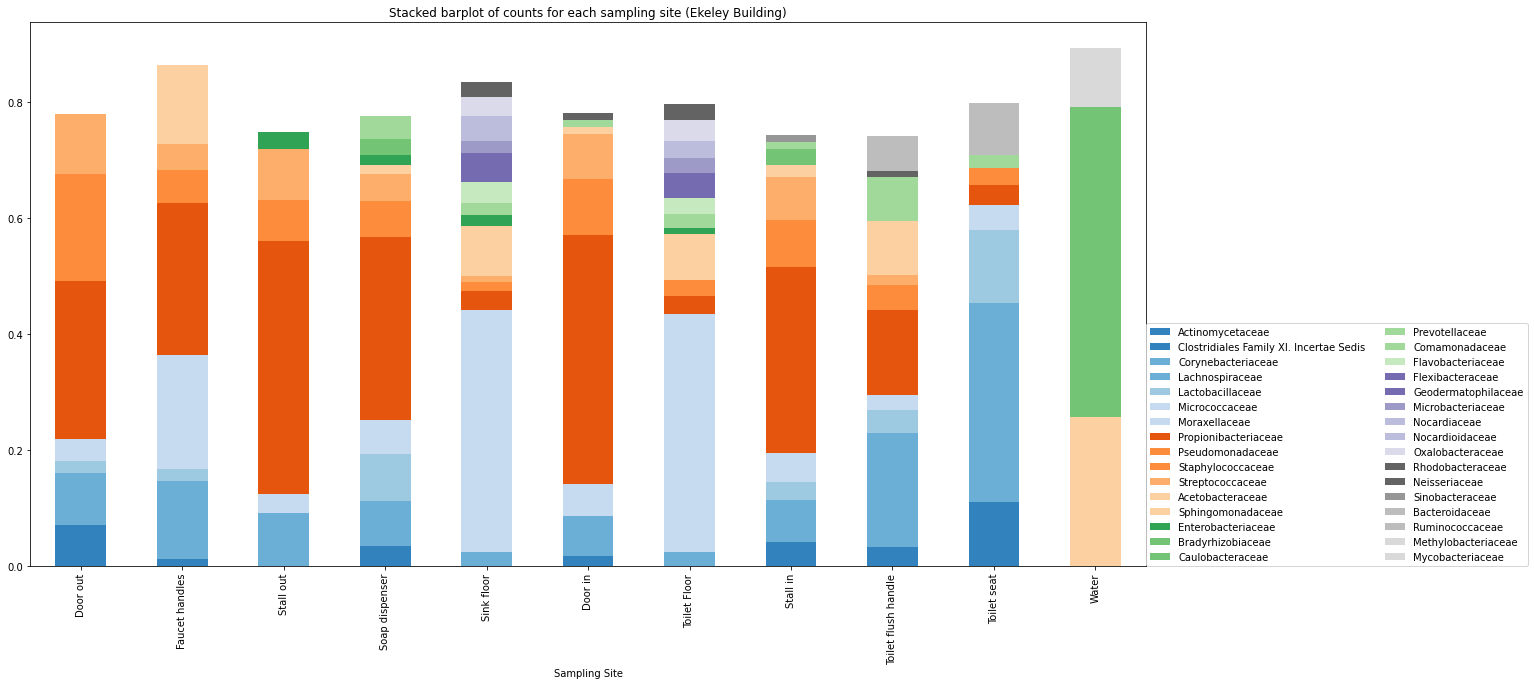

In [60]:
fig, ax = plt.subplots()
stacked_ekeley.plot(x='Sampling Site', kind='bar', stacked=True,
        title='Stacked barplot of counts for each sampling site (Ekeley Building)', colormap='tab20c', figsize=(20, 10), ax = ax)
ax.legend(ncol=2, loc=[1,0])
plt.show()

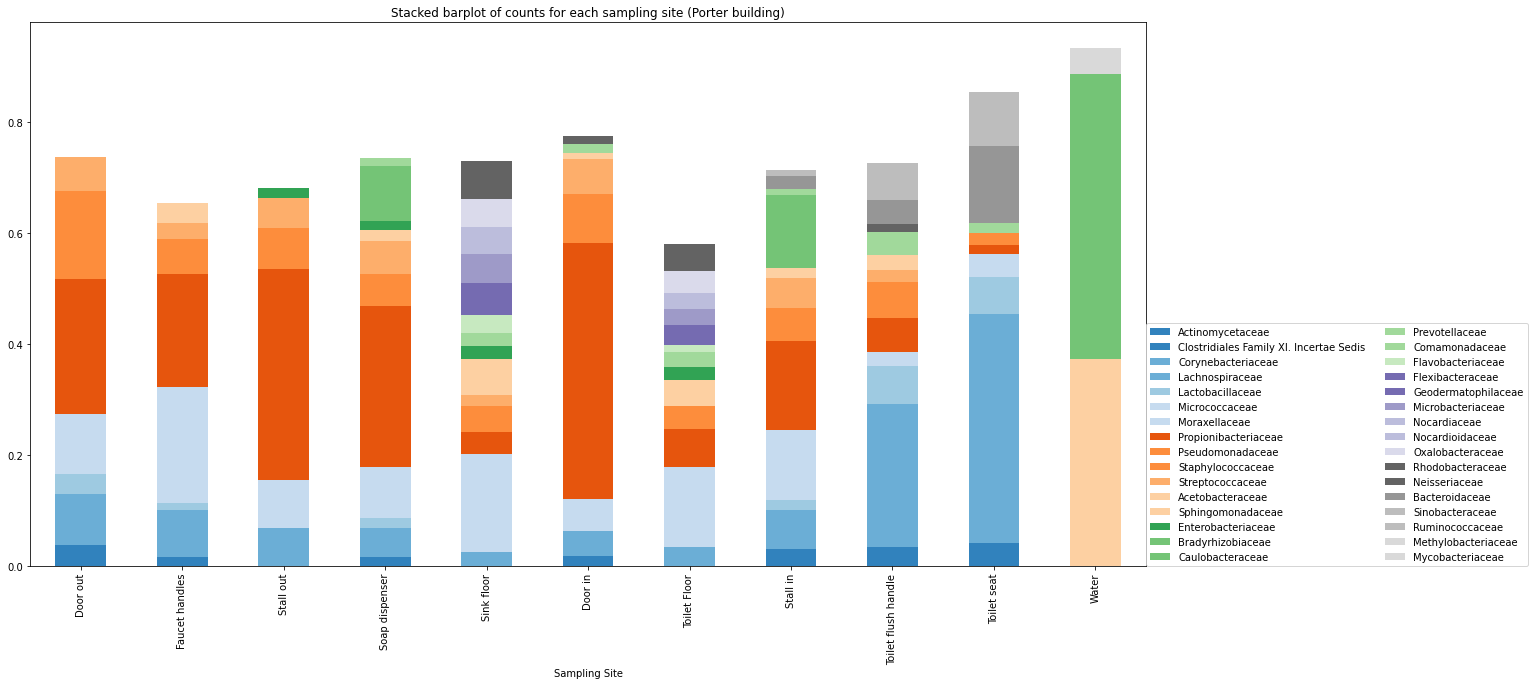

In [61]:
fig, ax = plt.subplots()
stacked_porter.plot(x='Sampling Site', kind='bar', stacked=True,
        title='Stacked barplot of counts for each sampling site (Porter building)', colormap='tab20c', figsize=(20, 10), ax = ax)
ax.legend(ncol=2, loc=[1,0])
plt.show()

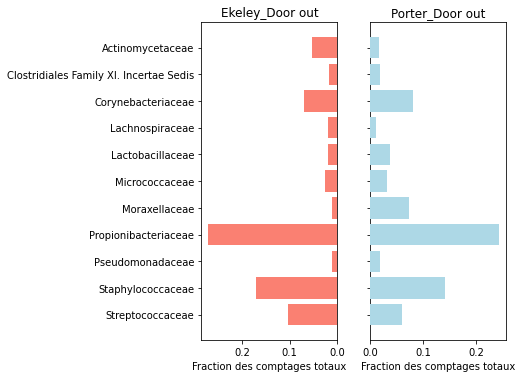

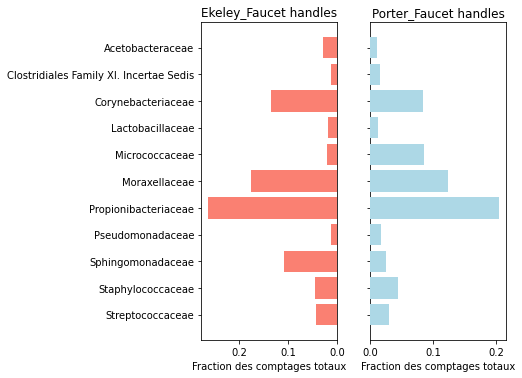

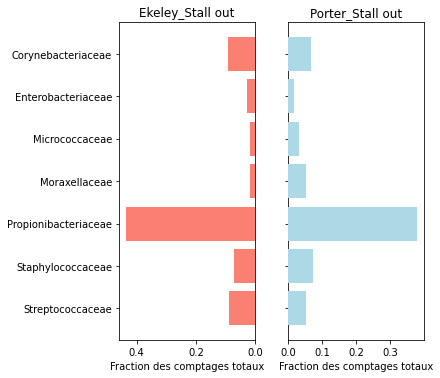

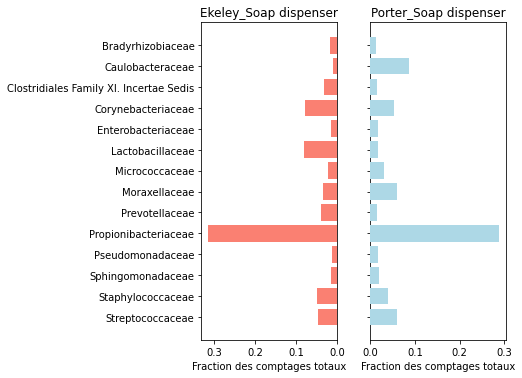

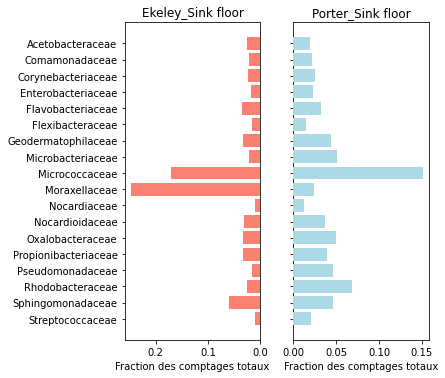

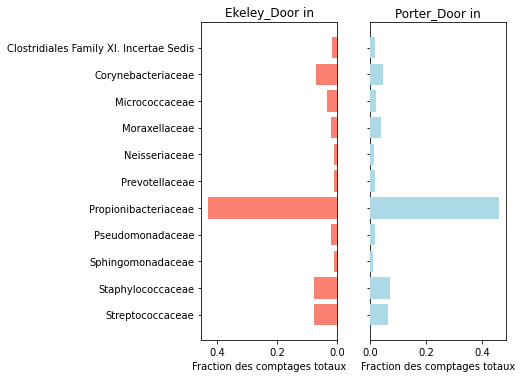

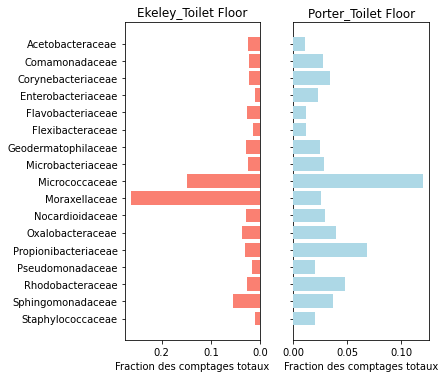

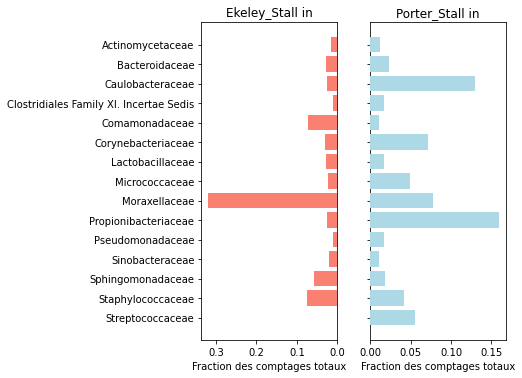

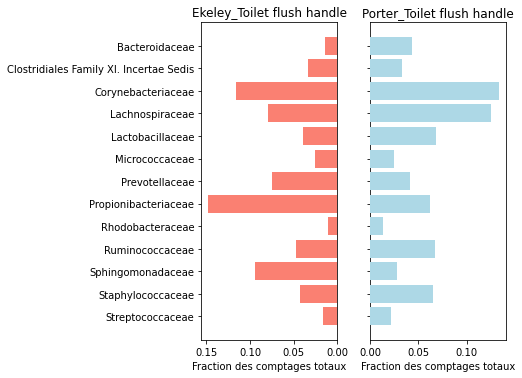

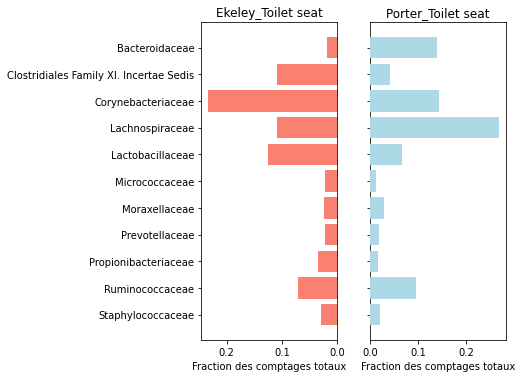

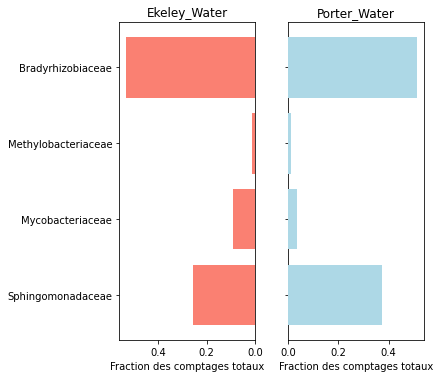

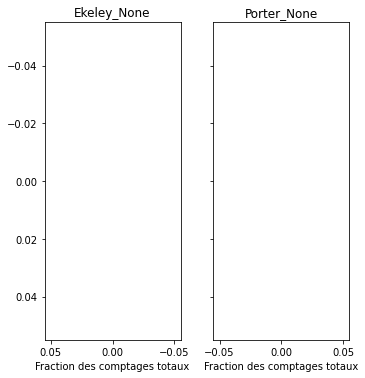

In [62]:
for surface in Ekeley.keys():

    color_Ekeley = 'salmon'
    color_Porter = 'lightblue'

    bacterial_families_E = list(Ekeley[surface].values())
    absolute_abundancy_E = list(Ekeley[surface].keys())
    
    bacterial_families_P = list(Porter[surface].values())
    absolute_abundancy_P = list(Porter[surface].keys())


    fig, axes = plt.subplots(figsize=(5,5), ncols=2, sharey=True)
    fig.tight_layout()


    axes[0].barh(absolute_abundancy_E, bacterial_families_E, align='center', color=color_Ekeley, zorder=10)
    axes[0].set_title(f"Ekeley_{surface}")
    axes[1].barh(absolute_abundancy_P, bacterial_families_P, align='center', color=color_Porter, zorder=10)
    axes[1].set_title(f"Porter_{surface}")
    axes[0].set_xlabel("Fraction des comptages totaux")
    axes[1].set_xlabel("Fraction des comptages totaux")
    axes[0].invert_yaxis() # labels read top-to-bottom
    axes[0].invert_xaxis() # mirror data for both duildings
    plt.show()

In [63]:
full_df = pd.merge(sampling_data_df, bacteria_data_df, on = 'SampleID')
full_df

,SampleID,Gender,Floor,Building,Surface,469478,208196,378462,265971,570812,...,115007,151393,528028,114903,144964,198655,203087,89363,542202,159715
0,EKCM2.489495,Male,C,Ekeley,Door out,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,EKBM8.489473,Male,B,Ekeley,Faucet handles,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,EKCF4.489498,Female,C,Ekeley,Stall out,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PTBM9.489505,Male,B,Porter,Soap dispenser,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EKBF10.489552,Female,B,Ekeley,Sink floor,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,B5.489455,None,B,Porter,Water,0.0,0.0,0.0,0.0,0.0,...,2392.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
106,B1.489537,None,A,Ekeley,Water,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,9.0,0.0,285.0,4.0,43.0,0.0,0.0
107,B3.489528,None,C,Ekeley,Water,0.0,0.0,0.0,0.0,0.0,...,17.0,1.0,0.0,0.0,0.0,184.0,2.0,79.0,10.0,17.0
108,B2.489526,None,B,Ekeley,Water,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,437.0,0.0,83.0,0.0,0.0


In [64]:
from collections import defaultdict
surf2sample = defaultdict(list)
otu2lineage = defaultdict(list)
for sample in full_df.iterrows() :
    sample_series = sample[1]
    surface = sample_series["Surface"]
    surf2sample[surface].append(sample_series[5:])
    if sample_series["SampleID"] == "ConsensusLineage" :
        for index in sample_series.index[5:] :
            otu2lineage[index] = sample_series[index]

In [65]:
def get_OTUs_count_for_surface(surface, surf2sample_dict) :
    count_ab_OTUs = {}

    for sample in surf2sample_dict[surface] :
        for otu_index in sample.index :
            count_ab_OTUs[otu_index] = count_ab_OTUs.get(otu_index, 0.0) + sample[otu_index]
    return count_ab_OTUs

In [66]:
count_ab_OTUs_door_out = get_OTUs_count_for_surface("Door out", surf2sample)
count_ab_OTUs_faucet = get_OTUs_count_for_surface("Faucet handles", surf2sample)
count_ab_OTUs_stall_in = get_OTUs_count_for_surface("Stall out", surf2sample)
count_ab_OTUs_soap = get_OTUs_count_for_surface("Soap dispenser", surf2sample)
count_ab_OTUs_sink = get_OTUs_count_for_surface("Sink floor", surf2sample)
count_ab_OTUs_stall_out = get_OTUs_count_for_surface("Stall in", surf2sample)
count_ab_OTUs_door = get_OTUs_count_for_surface("Door in", surf2sample)
count_ab_OTUs_toilet_floor = get_OTUs_count_for_surface("Toilet Floor", surf2sample)
count_ab_OTUs_toilet_handle = get_OTUs_count_for_surface("Toilet flush handle", surf2sample)
count_ab_OTUs_toilet_seat = get_OTUs_count_for_surface("Toilet seat", surf2sample)
count_ab_OTUs_water = get_OTUs_count_for_surface("Water", surf2sample)

In [67]:
otu2lineage_dict = dict(otu2lineage)

In [68]:
def phylo_count(count_ab_OTUs, otu2lineage) :
    phylo_OTU = pd.DataFrame(columns=["Domain", "Phylum", "Class", "Order", "Family", "Genus", "Count"])
    # Get OTU id to know which lineage to count.
    for OTU_id in count_ab_OTUs :
        lineage = otu2lineage[OTU_id].split(";")[:-1]
        lineagetoadd = []
        for tax in lineage :
            if len(tax) > 4 :
                lineagetoadd.append(tax.split("__")[1])
            else :
                lineagetoadd.append("  ")
        if count_ab_OTUs[OTU_id] != 0.0 :
            lineagetoadd.append(count_ab_OTUs[OTU_id]) 
            phylo_OTU.loc[len(phylo_OTU)] = lineagetoadd
        
        #count_ab_OTUs[otu2lineage[OTU_id]] = count_ab_OTUs.pop(OTU_id)
    return phylo_OTU

In [69]:
OTUs_count_phylo_door_out = phylo_count(count_ab_OTUs_door_out, otu2lineage_dict)
OTUs_count_phylo_faucet = phylo_count(count_ab_OTUs_faucet, otu2lineage_dict)
OTUs_count_phylo_stall_in = phylo_count(count_ab_OTUs_stall_in, otu2lineage_dict)
OTUs_count_phylo_soap = phylo_count(count_ab_OTUs_soap, otu2lineage_dict)
OTUs_count_phylo_sink = phylo_count(count_ab_OTUs_sink, otu2lineage_dict)
OTUs_count_phylo_stall_out = phylo_count(count_ab_OTUs_stall_out, otu2lineage_dict)
OTUs_count_phylo_door = phylo_count(count_ab_OTUs_door, otu2lineage_dict)
OTUs_count_phylo_toilet_floor = phylo_count(count_ab_OTUs_toilet_floor, otu2lineage_dict)
OTUs_count_phylo_toilet_handle = phylo_count(count_ab_OTUs_toilet_handle, otu2lineage_dict)
OTUs_count_phylo_toilet_seat = phylo_count(count_ab_OTUs_toilet_seat, otu2lineage_dict)
OTUs_count_phylo_water = phylo_count(count_ab_OTUs_water, otu2lineage_dict)

# Icicle Plots

## Door

In [70]:
import plotly.express as px

cmap = {'(?)':'white', 'Actinobacteria':'rgba(102,197,204,100)', 'Proteobacteria':'#00cc96', 'Firmicutes' : '#EF553B', 'Acidobacteria' : '#fe0000', 'Bacteroidetes' : '#ffd800', 'Cyanobacteria' : '#00fe21', 'Chloroflexi' : '#8f8a00', 'Gemmatimonadetes' : '#b4d3d4', 'Spirochaetes' : 'blue', 'TM7' : 'red', 'Tenericutes' : '#ff8080', 'Thermi' : '#7d898b', 'Verrucomicrobia' : '#b46a75'  }
fig = px.icicle(OTUs_count_phylo_door, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', title = "OTUs count on door", color = "Phylum",\
                 color_discrete_map=cmap)
#fig.title("OTUs count on door")
#fig.write_image("OTUs_count_door.png")
marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.data[0].marker['colors'] = marker_colors



fig.show()


## Door out

In [71]:
#tiling_dict = dict(orientation='v')
#cmap = {'(?)':'white', 'Actinobacteria':'#636efa', 'Proteobacteria':'#00cc96', 'Firmicutes' : '#EF553B', 'Acidobacteria' : 'lightblue', 'Bacteroidetes' : '#ffd800', 'Cyanobacteria' : '#00fe21', 'Chloroflexi' : '#8f8a00', 'Gemmatimonadetes' : '#b4d3d4', 'Spirochaetes' : 'blue', 'TM7' : 'red', 'Tenericutes' : '#ff8080', 'Thermi' : '#7d898b', 'Verrucomicrobia' : '#b46a75'  }
fig = px.icicle(OTUs_count_phylo_door_out, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count',title = "OTUs count on door out", color="Phylum", color_discrete_map = cmap)

marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.data[0].marker['colors'] = marker_colors

fig.show()

## Faucet

In [72]:
#cmap = {'(?)':'white', 'Actinobacteria':'#636efa', 'Proteobacteria':'#00cc96', 'Firmicutes' : '#EF553B', 'Acidobacteria' : '#fe0000', 'Bacteroidetes' : '#ffd800', 'Cyanobacteria' : '#00fe21', 'Chloroflexi' : '#8f8a00', 'Gemmatimonadetes' : '#b4d3d4', 'Spirochaetes' : 'blue', 'TM7' : 'red', 'Tenericutes' : '#ff8080', 'Thermi' : '#7d898b', 'Verrucomicrobia' : '#b46a75'  }

fig = px.icicle(OTUs_count_phylo_faucet, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', title = "OTUs count on faucet", color="Phylum", color_discrete_map = cmap)
marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.data[0].marker['colors'] = marker_colors
fig.show()

## Stall in

In [73]:
#cmap = {'(?)':'white', 'Actinobacteria':'#636efa', 'Proteobacteria':'#00cc96', 'Firmicutes' : '#EF553B', 'Acidobacteria' : '#fe0000', 'Bacteroidetes' : '#ffd800', 'Cyanobacteria' : '#00fe21', 'Chloroflexi' : '#8f8a00', 'Gemmatimonadetes' : '#b4d3d4', 'Spirochaetes' : 'blue', 'TM7' : 'red', 'Tenericutes' : '#ff8080', 'Thermi' : '#7d898b', 'Verrucomicrobia' : '#b46a75'  }
fig = px.icicle(OTUs_count_phylo_stall_in, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', title = "OTUs count on Stall in", color="Phylum", color_discrete_map = cmap)
marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.data[0].marker['colors'] = marker_colors
fig.show()

## Soap

In [74]:
#cmap = {'(?)':'white', 'Actinobacteria':'#636efa', 'Proteobacteria':'#00cc96', 'Firmicutes' : '#EF553B', 'Acidobacteria' : '#fe0000', 'Bacteroidetes' : '#ffd800', 'Cyanobacteria' : '#00fe21', 'Chloroflexi' : '#8f8a00', 'Gemmatimonadetes' : '#b4d3d4', 'Spirochaetes' : 'blue', 'TM7' : 'red', 'Tenericutes' : '#ff8080', 'Thermi' : '#7d898b', 'Verrucomicrobia' : '#b46a75'  }
fig = px.icicle(OTUs_count_phylo_soap, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', color="Phylum", title = "OTUs count on soap", color_discrete_map = cmap)
marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.data[0].marker['colors'] = marker_colors
fig.show()

## Sink

In [75]:
fig = px.icicle(OTUs_count_phylo_sink, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', color="Phylum", title = "OTUs count on sink", color_discrete_map = cmap)
marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.data[0].marker['colors'] = marker_colors
fig.show()

## Stall out

In [76]:
fig = px.icicle(OTUs_count_phylo_stall_out, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', color="Phylum", title = "OTUs count on stall out", color_discrete_map = cmap)
marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.data[0].marker['colors'] = marker_colors
fig.show()

## Toilet floor

In [77]:
fig = px.icicle(OTUs_count_phylo_toilet_floor, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', color="Phylum", title = "OTUs count on toilet floor", color_discrete_map=cmap)
marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.data[0].marker['colors'] = marker_colors
fig.show()

## Toilet handle

In [78]:
fig = px.icicle(OTUs_count_phylo_toilet_handle, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', color="Phylum", title = "OTUs count on toilet handle", color_discrete_map=cmap)
marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.data[0].marker['colors'] = marker_colors
fig.show()

## Toilet seat

In [79]:
fig = px.icicle(OTUs_count_phylo_toilet_seat, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', color="Phylum", title = "OTUs count on toilet seat", color_discrete_map = cmap)
marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.data[0].marker['colors'] = marker_colors
fig.show()

## Water

In [80]:
fig = px.icicle(OTUs_count_phylo_water, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', color="Phylum", color_discrete_map = cmap)
marker_colors = list(fig.data[0].marker['colors'])
marker_labels = list(fig.data[0]['labels'])
new_marker_colors = ["rgba(0,0,0,0)" if label=="  " or label == "Bacteria" else color for (color, label) in zip(marker_colors, marker_labels)]
marker_colors = new_marker_colors

fig.update_layout(
    font=dict(size=18  # Set the font size here
             )
    )


fig.data[0].marker['colors'] = marker_colors
fig.show()

In [81]:
counts=[OTUs_count_phylo_door_out,
OTUs_count_phylo_faucet,
OTUs_count_phylo_stall_in,
OTUs_count_phylo_soap,
OTUs_count_phylo_sink,
OTUs_count_phylo_stall_out,
OTUs_count_phylo_door,
OTUs_count_phylo_toilet_floor,
OTUs_count_phylo_toilet_handle,
OTUs_count_phylo_toilet_seat,
OTUs_count_phylo_water]
legend = ["door_out", "faucet", "stall_in", "soap", "sink", "stall_out", "door", "toilet_floor", "toilet_handle", "toilet_seat", "water"]

# Treemap

In [82]:
select = OTUs_count_phylo_stall_out
#choose whichever sampling site you want to pick from
'''
counts=[OTUs_count_phylo_door_out,
OTUs_count_phylo_faucet,
OTUs_count_phylo_stall_in,
OTUs_count_phylo_soap,
OTUs_count_phylo_sink,
OTUs_count_phylo_stall_out,
OTUs_count_phylo_door,
OTUs_count_phylo_toilet_floor,
OTUs_count_phylo_toilet_handle,
OTUs_count_phylo_toilet_seat,
OTUs_count_phylo_water]
'''

'\ncounts=[OTUs_count_phylo_door_out,\nOTUs_count_phylo_faucet,\nOTUs_count_phylo_stall_in,\nOTUs_count_phylo_soap,\nOTUs_count_phylo_sink,\nOTUs_count_phylo_stall_out,\nOTUs_count_phylo_door,\nOTUs_count_phylo_toilet_floor,\nOTUs_count_phylo_toilet_handle,\nOTUs_count_phylo_toilet_seat,\nOTUs_count_phylo_water]\n'

In [83]:
nonul = select[select['Count'] > 0]
nonul.loc[:,'Count']
nonul = nonul.copy(deep=True)
nonul['log_Count'] = np.log(nonul.loc[:,'Count'])


In [84]:
df = nonul
fig = px.treemap(df, path=["Domain", "Phylum", "Class", "Order", "Family", "Genus"], values='Count', color='log_Count',
                   hover_data=['Count'], color_continuous_scale='magma')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()
